# Trabajo práctico n° 2
## Evolución del salario joven

Integrantes:
- Mazo, Luis
- Hoj, Agustín
- Nacucchio, Illed

El objetivo de este programa es analizar la evolución del salario joven desde el 2007 hasta la actualidad y predecir cómo seguirá evolucionando el año entrante. Además, se propone hacer comparaciones sobre la valoración de cada sector de trabajo entre sí y contra el salario mínimo vital móvil. Para ello contamos con tres datasets: uno que contiene los datos sobre el salario joven en distintos sectores desde el 2007 hasta junio del 2023, uno con el salario mínimo vital móvil mensual, diario y por hora desde el 1965 hasta la actualidad, y un dataset que contiene los valores de conversión a dólar Blue del peso argentino desde el 2003 a la actualidad. Además, contamos con uno de apoyo del que extraeremos un diccionario con la información de los sectores de trabajo que se tienen en consideración.

### Librerías

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

### Preparación del DataFrame de Salario joven y el diccionario de Sectores

In [3]:
# Primero preparamos el dataframe donde quedará almacenado el dataset sobre salario joven, ofrecido por fuentes gubernamentales.


def salarios():
    dfSalarios = pd.read_csv("salario_joven.csv")
    dfSalarios.rename(columns={
        'fecha': 'Fecha',
        'clae2': 'Sector',
        'w_median': 'Sueldo Promedio'},
        inplace=True
    )
    return dfSalarios

dfSalarios = salarios()

# Luego generamos un diccionario con la información correspondiente a cada sector de trabajo incluido en el dataset
# Cargamos el dataset en un DataFrame
dfSectores = pd.read_csv('clae_agg.csv')
# Creamos el diccionario a partir de las columnas clae2 y clae2_desc, que se corresponden al ID del sector y su nombre
sectores_descripcion = dict(zip(dfSectores['clae2'], dfSectores['clae2_desc']))

In [25]:
# Previsualización del dataframe
dfSalarios

# Previsualización del diccionario
print("Referencias de cada sector: ")
for clave, valor in sectores_descripcion.items():
    print(f"{clave}: {valor}")

Referencias de cada sector: 
1: Agricultura, ganadería, caza y servicios relacionados
2: Silvicultura y explotación forestal
3: Pesca y acuicultura
5: Extracción de carbón y lignito
6: Extracción de petróleo crudo y gas natural
7: Extracción de minerales metálicos
8: Extracción de otros minerales
9: Actividades de apoyo al petróleo y la minería
10: Elaboración de productos alimenticios
11: Elaboración de bebidas
12: Elaboración de productos de tabaco
13: Elaboración de productos textiles
14: Elaboración de prendas de vestir
15: Elaboración de productos de cuero y calzado
16: Elaboración de productos de madera
17: Elaboración de productos de papel
18: Imprentas y editoriales
19: Fabricación de productos de refinación de petróleo
20: Fabricación de sustancias químicas
21: Elaboracion de productos farmacéuticos
22: Fabricación de productos de caucho y plástico
23: Fabricación de productos de vidrio y otros minerales no metálicos
24: Fabricación de metales comunes
25: Fabricación de produc

# Funciones para navegar y analizar las estadísticas de nuestro DataFrame

## Comparador de sectores

Ingresamos una palabra clave para comparar el Salario Promedio de los ultimos 16 años de todos los sectores que la incluyan.

Algunos ejemplos:
- **Fabricación**
- **Extracción**
- **Servicio**
- **Actividades**

In [5]:
# Construimos una función para buscar una palabra clave en el diccionario de Sectores y hallar los datos dentro del dataframe
def buscar_sectores(df, sectores_dic, palabra_clave):
    # Filtramos los sectores que contienen la palabra clave (ambas se transforman a minúsculas para aproximar la similitud)
    sectores_coincidentes = [sector for sector, nombre in sectores_dic.items() if palabra_clave.lower() in nombre.lower()]

    # Imprimimos el número y el valor asociado a los sectores coincidentes del diccionario
    print("Sectores que coinciden con la palabra clave:")
    for i, sector in enumerate(sectores_coincidentes):
        print(f"{sector}: {sectores_dic[sector]}")

    # Filtramos el DataFrame para obtener las filas con los sectores coincidentes
    df_coincidentes = df[df['Sector'].isin(sectores_coincidentes)]
    
    return df_coincidentes

# Construimos una función que genere el gráfico que pondrá en comparasión todos los sectores que contengan esa palabra clave
def generar_grafico(df):
    # Agrupamos por sector y calculamos el salario promedio
    salario_promedio_por_sector = df.groupby('Sector')['Sueldo Promedio'].mean().sort_values(ascending=False)

    # Creamos un gráfico de barras
    plt.figure(figsize=(15, 8))
    salario_promedio_por_sector.plot(kind='bar', color='skyblue')
    
    # Configuramos el gráfico y los textos que lo acompañan
    plt.title('Salario Promedio por Sector en los últimos 16 años')
    plt.xlabel('Sector')
    plt.ylabel('Salario Promedio')
    plt.xticks(rotation=45, ha='right')

    plt.show()

def buscador():
    palabra_clave = input("Ingrese la clave de búsqueda:")
    df_resultado = buscar_sectores(dfSalarios, sectores_descripcion, palabra_clave)

    # Imprimimos el gráfico en función de la palabra clave
    generar_grafico(df_resultado)


Sectores que coinciden con la palabra clave:
1: Agricultura, ganadería, caza y servicios relacionados
5: Extracción de carbón y lignito
6: Extracción de petróleo crudo y gas natural
7: Extracción de minerales metálicos
8: Extracción de otros minerales
9: Actividades de apoyo al petróleo y la minería
10: Elaboración de productos alimenticios
11: Elaboración de bebidas
12: Elaboración de productos de tabaco
13: Elaboración de productos textiles
14: Elaboración de prendas de vestir
15: Elaboración de productos de cuero y calzado
16: Elaboración de productos de madera
17: Elaboración de productos de papel
19: Fabricación de productos de refinación de petróleo
20: Fabricación de sustancias químicas
21: Elaboracion de productos farmacéuticos
22: Fabricación de productos de caucho y plástico
23: Fabricación de productos de vidrio y otros minerales no metálicos
24: Fabricación de metales comunes
25: Fabricación de productos elaborados del metal, excepto maquinaria y equipo
26: Fabricación de p

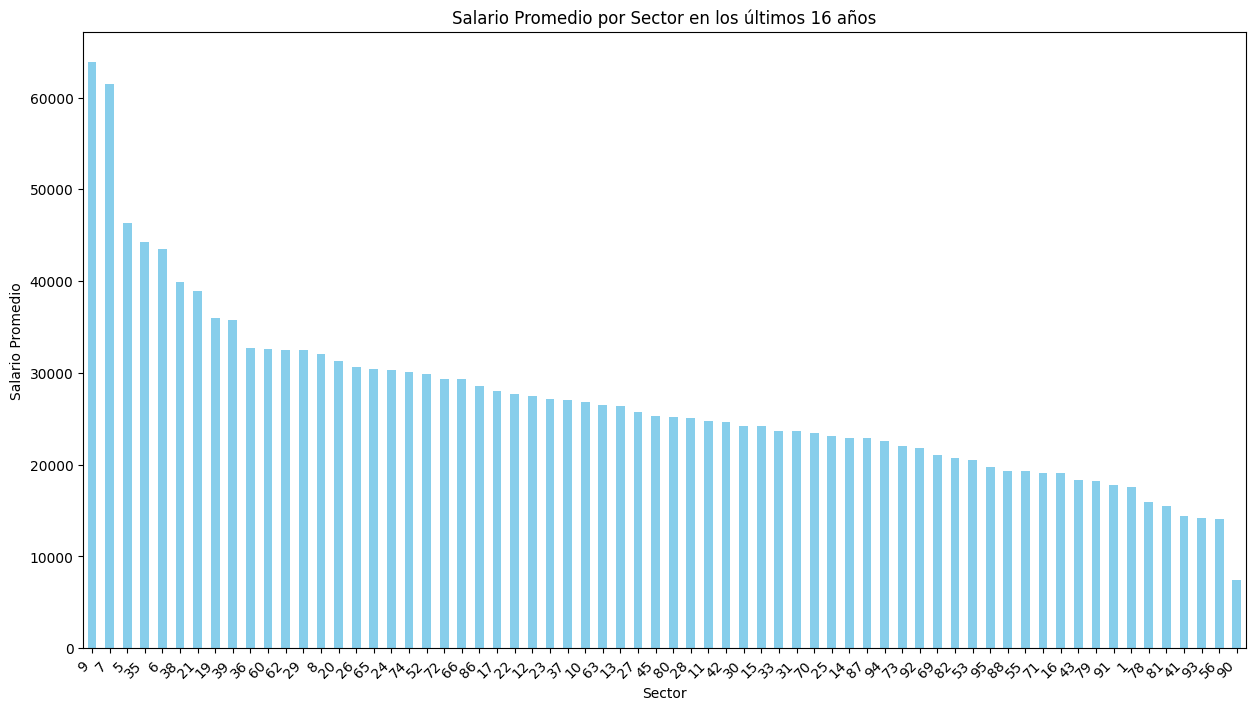

In [6]:
buscador()

# Con la palabra clave "Fabricación" podemos ver que la Fabricación de productos de refinación de petróleo
# tiene un salario promedio considerablemente mayor que cualquier otra clase de producto fabricado


## Comparador de salario mensual en cada sector por salario mínimo vital y móvil mensual:

Compararemos el **SMVM** con el **Sueldo Promedio de todos los sectores disponibles** del año y mes ingresados por el usuario. 

In [24]:
# Primero creamos un dataframe con los datos del dataset de Salario Mínimo Vital Móvil
dfSalarioMinimo = pd.read_csv("indice-salario-minimo-vital-movil-pesos-corrientes.csv")
# Modificamos los nombres de las columnas para hacerlos más manejables
dfSalarioMinimo.rename(columns={
        'indice_tiempo': 'Fecha',
        'salario_minimo_vital_movil_mensual': 'SMVM mensual',
        'salario_minimo_vital_movil_diario' : 'SMVM diario',
        'salario_minimo_vital_movil_hora' : 'SMVM hora'},
        inplace=True
    )

# Filtramos el DataFrame para eliminar las filas anteriores al año 2007
dfSalarioMinimo['Fecha'] = pd.to_datetime(dfSalarioMinimo['Fecha'])
dfSalarioMinimo = dfSalarioMinimo[dfSalarioMinimo['Fecha'].dt.year >= 2007]

# Previsualización del DataFrame resultante
print("Salario mínimo vital móvil en pesos corrientes: \n")

dfSalarioMinimo

Salario mínimo vital móvil en pesos corrientes: 



,Fecha,SMVM mensual,SMVM diario,SMVM hora
504,2007-01-01,800.0,32.0,4.0
505,2007-02-01,800.0,32.0,4.0
506,2007-03-01,800.0,32.0,4.0
507,2007-04-01,800.0,32.0,4.0
508,2007-05-01,800.0,32.0,4.0
...,...,...,...,...
703,2023-08-01,112500.0,4500.0,562.5
704,2023-09-01,118000.0,4720.0,590.0
705,2023-10-01,132000.0,5280.0,660.0
706,2023-11-01,146000.0,5840.0,730.0


In [8]:
# Luego creamos las funciones que nos permitirán hacer una búsqueda, una comparación y emitir un gráfico

def comparar_svmv_sueldo(df_sueldos, df_svmv, year, month):
    df_sueldos['Fecha'] = pd.to_datetime(df_sueldos['Fecha'])
    # Filtramos por año y mes
    df_sueldos_filtered = df_sueldos[(df_sueldos['Fecha'].dt.year == year) & (df_sueldos['Fecha'].dt.month == month)]
    df_svmv_filtered = df_svmv[(df_svmv['Fecha'].dt.year == year) & (df_svmv['Fecha'].dt.month == month)]

    # Agregamos columnas de año y mes a ambos DataFrames
    df_sueldos_filtered['Año'] = df_sueldos_filtered['Fecha'].dt.year
    df_sueldos_filtered['Mes'] = df_sueldos_filtered['Fecha'].dt.month

    df_svmv_filtered['Año'] = df_svmv_filtered['Fecha'].dt.year
    df_svmv_filtered['Mes'] = df_svmv_filtered['Fecha'].dt.month

    # Calculamos el Sueldo Promedio mensual por sector
    sueldo_promedio_mensual = df_sueldos_filtered.groupby(['Año', 'Mes', 'Sector'])['Sueldo Promedio'].mean().reset_index()

    # Comparamos el Sueldo Promedio mensual con el SVMV mensual
    resultado_comparacion = pd.merge(sueldo_promedio_mensual, df_svmv_filtered, on=['Año', 'Mes'], how='left')
    resultado_comparacion.drop(['SMVM diario', 'SMVM hora'], axis=1, inplace=True)
    return resultado_comparacion

def grafico_comparativo_sueldo_svmv(df_comparacion, year, month):
    # Filtramos por año y mes
    df_comparacion_filtered = df_comparacion[(df_comparacion['Año'] == year) & (df_comparacion['Mes'] == month)]
    # Filtramos el Sector 999: Otros porque dificulta la lectura del gráfico
    df_comparacion_filtered = df_comparacion_filtered[df_comparacion_filtered['Sector'] != 999]
    # Configuramos el gráfico con un ancho razonable para una lectura eficaz
    plt.figure(figsize=(20, 10))
    plt.bar(df_comparacion_filtered['Sector'], df_comparacion_filtered['Sueldo Promedio'], label='Sueldo Promedio', color='teal')
    plt.plot(df_comparacion_filtered['Sector'], df_comparacion_filtered['SMVM mensual'], marker='o', linestyle='-', color='orange', label='SMVM mensual')

    # Añadimos texto al gráfico
    plt.xticks(df_comparacion_filtered['Sector'], df_comparacion_filtered['Sector'])
    plt.xlabel('Sector')
    plt.ylabel('Monto')
    plt.title(f'Comparación de Sueldo Promedio y SMVM mensual - {year}/{month}')
    plt.legend()
    
    plt.show()

    return(df_comparacion_filtered.loc[0,'SMVM mensual'])

def buscadorSMVM():
    anio_clave = int(input("Ingrese el año de búsqueda:"))
    mes_clave = int(input("Ingrese el mes:"))
    resultado_comparacion = comparar_svmv_sueldo(dfSalarios, dfSalarioMinimo, anio_clave, mes_clave)

    # A partir de los datos buscados, imprimimos un gráfico
    return grafico_comparativo_sueldo_svmv(resultado_comparacion, anio_clave, mes_clave)

    

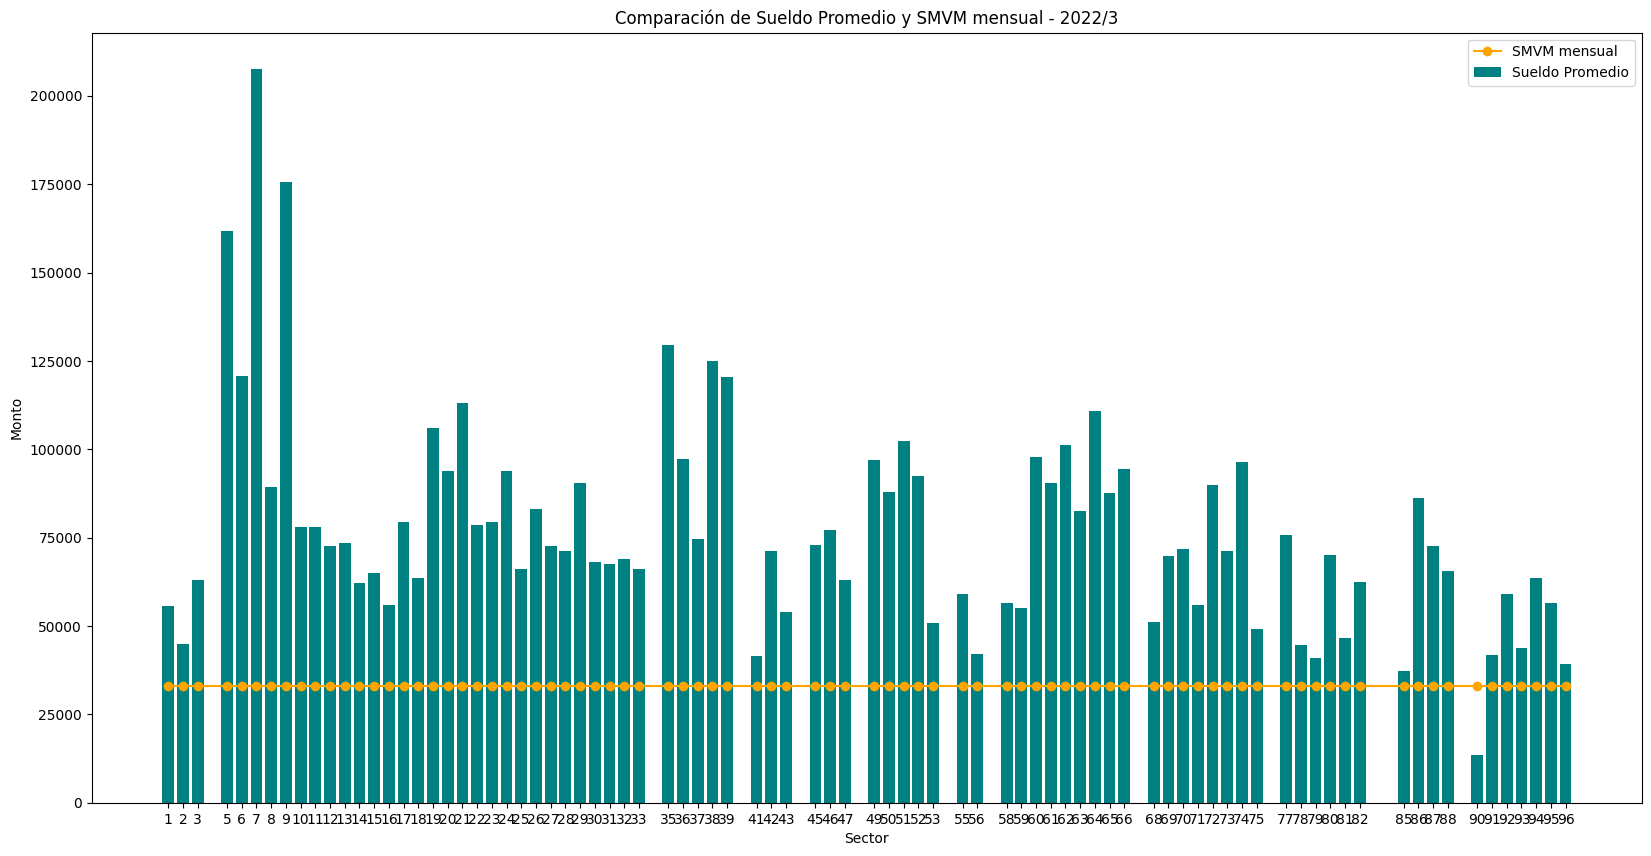

Valor del SMVM:  33000.0


In [19]:
print("Valor del SMVM: ",buscadorSMVM())



# Si buscamos marzo del 2009, por ejemplo, podemos ver que los tres sueldos promedios más altos son:

# 9: Actividades de apoyo al petróleo y la minería, 6: Extracción de petróleo crudo y gas natural y 51: Transporte Aéreo,
# en ese orden, seguidos por 7: Extracción de minerales metálicos, 35: Suministro de electricidad, gas, vapor y aire acondicionado
# y 60: Programación y transmisiones de TV y radio. Es decir que las dos actividades mejores remuneradas están dedicadas al petróleo
# y entre las 6 mejor remuneradas, 3 están vinculadas a la extracción y 3 a la producción de energía.
# En cuanto a aquellos que están por debajo del salario mínimo, de menor a mayor nos encontramos con:
# 90: Servicios artísticos y de espectáculos, 85: Enseñanza, 56: Servicios de expendio de alimentos y bebidas,
# 88: Actividades de atención sin alojamiento, 96: Otros servicios personales y 75: Servicios veterinarios.


## Consular Sector

In [10]:
# Función que devuelve el nombre del sector basado en su número, para facilitar la lectura del gráfico anterior
def buscar_sector(_sector):
    print(_sector, ":", sectores_descripcion[_sector])

sector_a_buscar = int(input("Número del sector que desea buscar en el diccionario:"))
buscar_sector(sector_a_buscar)

3 : Pesca y acuicultura


### Predicciones

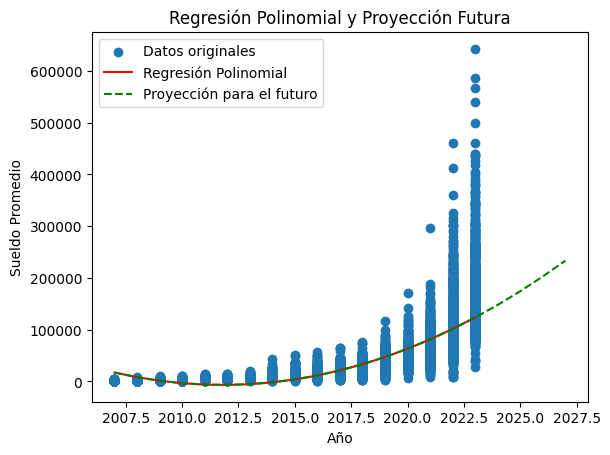

Predicción de salario promedio joven para el año 2020: $62,989.87


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Agregamos una columna de año
dfSalarios['Año'] = dfSalarios['Fecha'].dt.year

X = dfSalarios[['Año']].values
y = dfSalarios['Sueldo Promedio'].values

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trabajamos con polinomios porque al hacer un gráfico de recta comprobamos que nuestros datos hacían una curva
grado_polinomio = 2

# Creamos el modelo de regresión polinomial
modelo_polinomial = make_pipeline(PolynomialFeatures(degree=grado_polinomio), LinearRegression())

# Ajustamos el modelo en todo el conjunto de datos
modelo_polinomial.fit(X, y)

# Predecimos el salario para los datos originales
y_pred = modelo_polinomial.predict(X)

# Predecimos el salario para valores de años futuros (para graficar la proyección)
años_futuros = np.arange(X.min(), X.max() + 5).reshape(-1, 1)  # proyección para 5 años adicionales
y_pred_futuro = modelo_polinomial.predict(años_futuros)

# Graficamos los datos originales y la regresión polinomial
plt.scatter(X, y, label='Datos originales')
plt.plot(X, y_pred, label='Regresión Polinomial', color='red')
plt.plot(años_futuros, y_pred_futuro, label='Proyección para el futuro', linestyle='--', color='green')
plt.xlabel('Año')
plt.ylabel('Sueldo Promedio')
plt.title('Regresión Polinomial y Proyección Futura')
plt.legend()
plt.show()

# Prevemos el salario para el año pedido
anio = input("Año que desea predecir:")
sueldo_proximo_anio = modelo_polinomial.predict([[anio]])

print(f"Predicción de salario promedio joven para el año {anio}: ${sueldo_proximo_anio[0]:,.2f}")

In [12]:
# Ajustamos el modelo en el conjunto de entrenamiento
modelo_polinomial.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_polinomial = modelo_polinomial.predict(X_test)

# Calculamos métricas de evaluación
mse_polinomial = mean_squared_error(y_test, y_pred_polinomial)
rmse_polinomial = np.sqrt(mse_polinomial)
r2_polinomial = r2_score(y_test, y_pred_polinomial)

print("Mean Squared Error (MSE) - Regresión Polinomial:", mse_polinomial)
print("Root Mean Squared Error (RMSE) - Regresión Polinomial:", rmse_polinomial)
print("R² en conjunto de prueba - Regresión Polinomial:", r2_polinomial)

Mean Squared Error (MSE) - Regresión Polinomial: 714438717.5443345
Root Mean Squared Error (RMSE) - Regresión Polinomial: 26728.986466836606
R² en conjunto de prueba - Regresión Polinomial: 0.6585727632479923


In [13]:
dfSalarios

,Fecha,Sector,Sueldo Promedio,Año
0,2007-01-01,999,687,2007
1,2007-01-01,1,800,2007
2,2007-01-01,2,736,2007
3,2007-01-01,3,1473,2007
4,2007-01-01,5,999,2007
...,...,...,...,...
16910,2023-07-01,92,193317,2023
16911,2023-07-01,93,116402,2023
16912,2023-07-01,94,176101,2023
16913,2023-07-01,95,134212,2023


## Conversiones a dólar

Se muestra el tipo de cambio mensual historico desde 2007

In [23]:
# Construimos una función para generar un promedio por mes de cada año de la conversión del dólar oficial y dólar blue
def calcular_tasa_promedio_mensual(csv_file, _encoding):
    # Columnas que deseamos leer (en este caso, las dos primeras); son las que necesitamos y las demás generan conflictos en su lectura
    columns_to_read = ['Fecha', 'Último']

    # Cargamos el CSV utilizando solo las columnas especificadas
    dfDolar = pd.read_csv(csv_file, sep=',', encoding=_encoding, usecols=columns_to_read)

    # Convertimos la 'Fecha' a tipo datetime
    dfDolar['Fecha'] = pd.to_datetime(dfDolar['Fecha'], dayfirst=True)
        
    # Convertimos 'Último' a tipo numérico, ignorando los errores
    dfDolar['Último'] = pd.to_numeric(dfDolar['Último'], errors='coerce')
        
    # Por si acaso, eliminamos filas con valores no numéricos
    dfDolar = dfDolar.dropna(subset=['Último'])
        
    # Creamos columnas adicionales para año y mes
    dfDolar['Año'] = dfDolar['Fecha'].dt.year
    dfDolar['Mes'] = dfDolar['Fecha'].dt.month

    # Modificamos el nombre de la columna 'Último'
    dfDolar = dfDolar.rename(columns={'Último': 'Conversión promedio'})

    # Calculamos el promedio mensual de conversión
    promedio_mensual = dfDolar.groupby(['Año', 'Mes'])['Conversión promedio'].mean().reset_index()
    
    return promedio_mensual # Lo devolvemos

# Dólar blue
promedioBlue = calcular_tasa_promedio_mensual('datos-historicos-USD_ARSB.csv', 'latin-1')
print("Blue:\n")
promedioBlue



Blue:



,Año,Mes,Conversión promedio
0,2007,1,3.104783
1,2007,2,3.115500
2,2007,3,3.119091
3,2007,4,3.117619
4,2007,5,3.113478
...,...,...,...
198,2023,7,517.710526
199,2023,8,669.318182
200,2023,9,735.750000
201,2023,10,907.875000


Previsualizamos los salarios en Dolares de todos los sectores

In [26]:
def salario_a_dolar(_df):

    _df['Fecha'] = pd.to_datetime(_df['Fecha'], dayfirst=True)

    # Crear columna adicional mes en dfSalarios
    _df['Mes'] = _df['Fecha'].dt.month

    # Unir dfSalarios con el promedio_mensual del dólar blue
    _df = pd.merge(_df, promedioBlue, on=['Año', 'Mes'], how='left')
    # Calcular el equivalente del salario en dólares blue
    _df['Salario en dólar blue'] = _df['Sueldo Promedio'] / _df['Conversión promedio']

    # Eliminamos la columna 'Fecha' y 'Conversión promedio'
    _df = _df.drop(['Fecha', 'Conversión promedio'], axis=1)

    # Mostrar el DataFrame resultante
    return _df

salarios_dolar_blue = salario_a_dolar(dfSalarios)
print("Salario en dólar Blue:\n")
salarios_dolar_blue

Salario en dólar Blue:



,Sector,Sueldo Promedio,Año,Mes,Salario en dólar blue
0,999,687,2007,1,221.271531
1,1,800,2007,1,257.666993
2,2,736,2007,1,237.053634
3,3,1473,2007,1,474.429352
4,5,999,2007,1,321.761658
...,...,...,...,...,...
16910,92,193317,2023,7,373.407513
16911,93,116402,2023,7,224.839933
16912,94,176101,2023,7,340.153408
16913,95,134212,2023,7,259.241397


## Calculador de Peso Argentino a Dolar Blue

Transforma un monto determinado en **Pesos Argentinos** al **Dolar Blue**, dado un determinado año y mes.

In [ ]:
def convertir_a_dolaresB(monto, año, mes, tasa_promedio_mensual):
    # Filtro el DataFrame para obtener la tasa de cambio correspondiente al año y mes especificados
    filtro = (tasa_promedio_mensual['Año'] == año) & (tasa_promedio_mensual['Mes'] == mes)

    if filtro.any():  # Verifico si hay al menos una fila después de aplicar el filtro
        tasa_cambio = tasa_promedio_mensual.loc[filtro, 'Conversión promedio'].values[0]
        # Realizo la conversión
        monto_en_dolares = monto / tasa_cambio
        return monto_en_dolares
    else:
        print(f"No hay datos disponibles para el año {año} y mes {mes}.")
        return None
    
def convertidor_peso_dolar():

    tasa_promedio_mensual = calcular_tasa_promedio_mensual('datos-historicos-USD_ARSB.csv', 'latin-1')

    monto_pesos = int(input("Monto de pesos argentinos que desea convertir a dólares:"))
    año_conversion = int(input("El año en el que se desea calcular la conversión:"))
    mes_conversion = int(input("El mes en el que se desea calcular la conversión:"))

    monto_dolaresB = convertir_a_dolaresB(monto_pesos, año_conversion, mes_conversion, tasa_promedio_mensual)
    if monto_dolaresB is not None:
        print(f'{monto_pesos} pesos argentinos eran aproximadamente {monto_dolaresB:.2f} dólares americanos blue el 15/{mes_conversion}/{año_conversion}.')
    else:
        print("No se pudo realizar la conversión. Verifica los datos disponibles.")

conv = convertidor_peso_dolar()
print(conv)

1000 pesos argentinos eran aproximadamente 3.07 dólares americanos blue el 15/12/2022.
None


## Comparador de salarios historicos por sector

Se ingresan dos sectores para la comparacion de su **salario historico anual** en Pesos Argentinos y Dolares

Tambien se puede consultar solo un sector especifico ingresando un 0 en el segundo campo

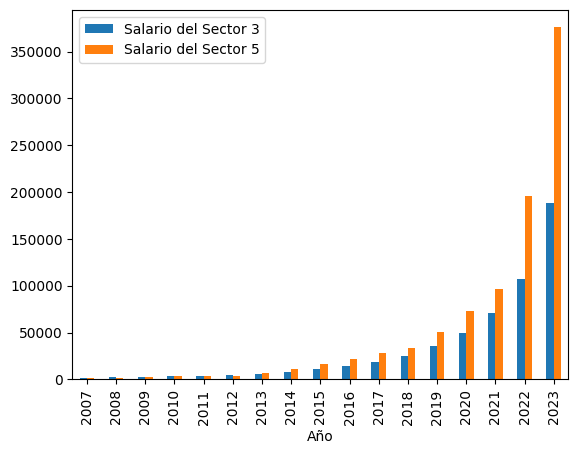

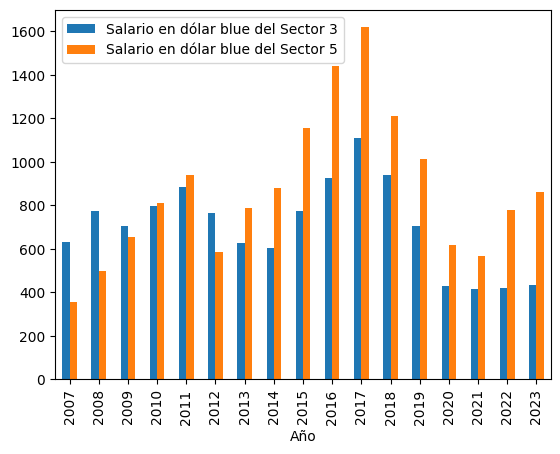

,Sector,Salario del Sector 3,Salario del Sector 5,Salario en dólar blue del Sector 3,Salario en dólar blue del Sector 5
Año,,,,,
2007,3.0,1986.083333,1127.000000,631.395765,358.385589
2008,3.0,2490.083333,1600.750000,775.160914,496.766852
2009,3.0,2660.583333,2477.500000,704.680050,655.813868
2010,3.0,3181.166667,3238.333333,798.612521,813.559202
2011,3.0,3850.333333,4080.250000,882.697414,940.632139
2012,3.0,4417.666667,3393.500000,767.416807,586.933851
2013,3.0,5511.333333,6949.500000,626.233475,790.330589
2014,3.0,7561.666667,10919.416667,604.911729,882.166011
2015,3.0,10845.833333,16043.416667,773.065785,1154.861104


In [16]:
# Creamos una función que busca el sector de trabajo y emite una tabla con el sueldo promedio anual de dicho sector
# y genera un gráfico de barras que muestra la evolución en el tiempo
def salario_por_anio(sector, sector2):

    # Filtramos por el sector seleccionado los datos de cada año
    dfSalariosFiltrado = salarios_dolar_blue.loc[salarios_dolar_blue['Sector'] == sector]

    renombrePesos = 'Salario del Sector ' + str(sector)
    renombreDolarB = 'Salario en dólar blue del Sector ' + str(sector)
    dfSalariosFiltrado = dfSalariosFiltrado.rename(columns={'Sueldo Promedio': renombrePesos,
                                                                'Salario en dólar blue': renombreDolarB})

    # Agrupamos por año y calculamos el promedio de sueldo entre todos los meses
    anio = dfSalariosFiltrado['Año']
    dfSalariosFiltrado = dfSalariosFiltrado.groupby(anio).mean()

    # Agregamos columna secundaria
    if sector2 != 0:
        df2 = salarios_dolar_blue.loc[salarios_dolar_blue['Sector'] == sector2]

        renombreDolarB2 = 'Salario en dólar blue del Sector ' + str(sector2)
        renombrePesos2 = 'Salario del Sector ' + str(sector2)
        df2 = df2.rename(columns={'Sueldo Promedio': renombrePesos2, 'Salario en dólar blue': renombreDolarB2})

        anio = df2['Año']
        df2 = df2.groupby(anio).mean()

        df2Salarios = df2[[renombrePesos2, renombreDolarB2]]

        dfSalariosFiltrado = dfSalariosFiltrado.join(df2Salarios)

        dfSalariosFiltrado = dfSalariosFiltrado[['Sector',renombrePesos,renombrePesos2,renombreDolarB,renombreDolarB2]]

        dfSalariosFiltrado[[renombrePesos, renombrePesos2]].plot.bar(legend=True)
        plt.show()

        dfSalariosFiltrado[[renombreDolarB, renombreDolarB2]].plot.bar(legend=True)
        plt.show()
    else:
        dfSalariosFiltrado[[renombrePesos]].plot.bar(legend=True)
        plt.show()

        dfSalariosFiltrado[[renombreDolarB]].plot.bar(legend=True)
        plt.show()



    display(dfSalariosFiltrado.head(20))
 

# Interfaz para que el usuario ingrese el sector de trabajo
sector = int(input("Ingresar el Sector de trabajo como figura en su valor numérico:"))
sector2 = int(input("Ingresar un segundo Sector de Actividad como figura en su valor numérico (0 para no agregar ninguno):"))
salario_por_anio(sector, sector2)

- Conocer el promedio del salario de cada sector por año:

In [18]:
salarios_dolar_blue

,Sector,Sueldo Promedio,Año,Mes,Salario en dólar blue
0,999,687,2007,1,221.271531
1,1,800,2007,1,257.666993
2,2,736,2007,1,237.053634
3,3,1473,2007,1,474.429352
4,5,999,2007,1,321.761658
...,...,...,...,...,...
16910,92,193317,2023,7,373.407513
16911,93,116402,2023,7,224.839933
16912,94,176101,2023,7,340.153408
16913,95,134212,2023,7,259.241397
